# Quality of trees (proportion of confident branches, LPP) for 1,510 genomes from the WoL2

In [1]:
import sys, re
import pandas as pd
import numpy as np
from skbio.tree import TreeNode
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 12,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

Genomes

In [4]:
genomes = np.loadtxt(f'./input_data/genomes_sampled_family_10.txt', dtype = str)

Astral-pro version

In [5]:
version = 2

### 41 SCG from Martinez-Gutierrez

In [6]:
dataPathIn = f'./input_data/wol2/martinez_gutierrez/wol2'

In [7]:
tree_martinez = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_martinez

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [8]:
df_martinez = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_martinez.shape

(1508, 9)

### 57 SCG from Moody 2024

In [9]:
dataPathIn = f'./input_data/wol2/moody/wol2'

In [10]:
tree_moody = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_moody

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [11]:
df_moody = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_moody.shape

(1508, 9)

### 400 SCG from Phylophlan3

In [12]:
dataPathIn = f'./input_data/wol2/phylophlan/wol2_min_marker_genes_per_genome_100'

In [13]:
tree_phylophlan_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_phylophlan_min

<TreeNode, name: N1, internal node count: 1504, tips count: 1506>

In [14]:
df_phylophlan_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_phylophlan_min.shape

(1504, 9)

In [15]:
dataPathIn = f'./input_data/wol2/phylophlan/wol2_min_marker_genes_per_genome_1'
tree_phylophlan_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_phylophlan_no_min

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [16]:
df_phylophlan_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_phylophlan_no_min.shape

(1508, 9)

### 136 SCG from Amphora2

In [17]:
dataPathIn = f'./input_data/wol2/amphora2/wol2_min_marker_genes_per_genome_34'

In [18]:
tree_amphora_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_amphora_min

<TreeNode, name: N1, internal node count: 1439, tips count: 1441>

In [19]:
df_amphora_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_amphora_min.shape

(1439, 9)

In [20]:
tips_amphora_min = [node.name for node in tree_amphora_min.tips()]

In [21]:
dataPathIn = f'./input_data/wol2/amphora2/wol2_min_marker_genes_per_genome_1'
tree_amphora_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_amphora_no_min

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [22]:
df_amphora_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_amphora_no_min.shape

(1508, 9)

In [23]:
tips_amphora_no_min = [node.name for node in tree_amphora_no_min.tips()]

### Marker genes selected with our method--KEGG

In [24]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
ps = [0]
matrix = 'presence_absence_copies'
threshold = 1.0

In [25]:
%%time
trees_kegg_min = {}
metadata_kegg_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/min_marker_genes_per_genome/{combination}'
        try:
            metadata_kegg_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_kegg_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 8.21 s, sys: 66.6 ms, total: 8.28 s
Wall time: 8.38 s


In [26]:
%%time
trees_kegg_no_min = {}
metadata_kegg_no_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/no_min_marker_genes_per_genome/{combination}'
        try:
            metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_kegg_no_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 8.26 s, sys: 61.1 ms, total: 8.32 s
Wall time: 8.35 s


### Marker genes selected with our approach--EggNog

In [27]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
ps = [0]
matrix = 'presence_absence_copies'
threshold = 1.0

In [28]:
%%time
trees_eggnog_min = {}
metadata_eggnog_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/min_marker_genes_per_genome/{combination}'
        try:
            metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_eggnog_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 8.19 s, sys: 66.9 ms, total: 8.25 s
Wall time: 8.28 s


In [29]:
%%time
trees_eggnog_no_min = {}
metadata_eggnog_no_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/no_min_marker_genes_per_genome/{combination}'
        try:
            metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_eggnog_no_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 8.27 s, sys: 62 ms, total: 8.34 s
Wall time: 8.37 s


# Figures

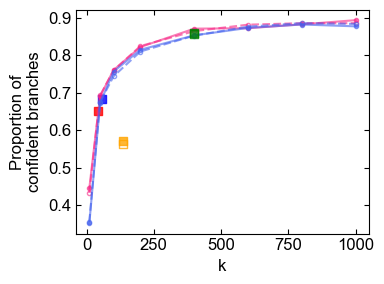

In [30]:
plt.figure(figsize = (4, 3))

# KEGG
y_kegg_min = []
y_kegg_no_min = []
for k in ks:
    datum_kegg_min = metadata_kegg_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    datum_kegg_no_min = metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    y_kegg_min.append(np.sum(datum_kegg_min >= 0.95) / len(datum_kegg_min))
    y_kegg_no_min.append(np.sum(datum_kegg_no_min >= 0.95) / len(datum_kegg_no_min))
plt.plot(ks, y_kegg_min, color = '#f72585', alpha = 0.6, marker = '.', label = f'KEGG')
plt.plot(ks, y_kegg_no_min, color = '#f72585', alpha = 0.6, marker = '.', ls = 'dashed',
        markerfacecolor = 'none')

# EggNog
y_eggnog_min = []
y_eggnog_no_min = []
for k in ks:
    datum_eggnog_min = metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    datum_eggnog_no_min = metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    y_eggnog_min.append(np.sum(datum_eggnog_min >= 0.95) / len(datum_eggnog_min))
    y_eggnog_no_min.append(np.sum(datum_eggnog_no_min >= 0.95) / len(datum_eggnog_no_min))
plt.plot(ks, y_eggnog_min, color = '#4361ee', alpha = 0.6, marker = '.', label = f'EggNog')
plt.plot(ks, y_eggnog_no_min, color = '#4361ee', alpha = 0.6, marker = '.', ls = 'dashed',
        markerfacecolor = 'none')

# Previous marker sets
datum_martinez = df_martinez['pp1'].values
plt.scatter(41, np.sum(datum_martinez >= 0.95) / len(datum_martinez), color = 'r', marker = 's', alpha = 0.8, label = 'Martinez')
datum_moody = df_moody['pp1'].values
plt.scatter(57, np.sum(datum_moody >= 0.95) / len(datum_moody), color = 'b', marker = 's', alpha = 0.8, label = 'Moody')

datum_phylophlan_min = df_phylophlan_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_min >= 0.95) / len(datum_phylophlan_min), color = 'g', marker = 's',
            alpha = 0.8, label = 'Phylophlan3',
           zorder = 2)

datum_phylophlan_no_min = df_phylophlan_no_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_no_min >= 0.95) / len(datum_phylophlan_no_min), color = 'g', marker = 's',
            alpha = 0.8,
           zorder = 2, facecolor = 'none')

datum_amphora_min = df_amphora_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_min >= 0.95) / len(datum_amphora_min), color = 'orange', marker = 's',
            alpha = 0.8, label = 'Amphora2')
datum_amphora_no_min = df_amphora_no_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_no_min >= 0.95) / len(datum_amphora_no_min), color = 'orange', marker = 's',
            alpha = 0.8, facecolor = 'none')

plt.xlabel('k')
plt.ylabel('Proportion of\nconfident branches')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')

plt.savefig(f'./figures/figure_3A.svg')
plt.show()

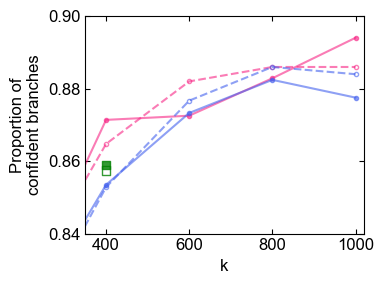

In [31]:
plt.figure(figsize = (4, 3))

# KEGG
y_kegg_min = []
y_kegg_no_min = []
for k in ks:
    datum_kegg_min = metadata_kegg_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    datum_kegg_no_min = metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    y_kegg_min.append(np.sum(datum_kegg_min >= 0.95) / len(datum_kegg_min))
    y_kegg_no_min.append(np.sum(datum_kegg_no_min >= 0.95) / len(datum_kegg_no_min))
plt.plot(ks, y_kegg_min, color = '#f72585', alpha = 0.6, marker = '.', label = f'KEGG')
plt.plot(ks, y_kegg_no_min, color = '#f72585', alpha = 0.6, marker = '.', ls = 'dashed',
        markerfacecolor = 'none')

# EggNog
y_eggnog_min = []
y_eggnog_no_min = []
for k in ks:
    datum_eggnog_min = metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    datum_eggnog_no_min = metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}']['pp1'].values
    y_eggnog_min.append(np.sum(datum_eggnog_min >= 0.95) / len(datum_eggnog_min))
    y_eggnog_no_min.append(np.sum(datum_eggnog_no_min >= 0.95) / len(datum_eggnog_no_min))
plt.plot(ks, y_eggnog_min, color = '#4361ee', alpha = 0.6, marker = '.', label = f'EggNog')
plt.plot(ks, y_eggnog_no_min, color = '#4361ee', alpha = 0.6, marker = '.', ls = 'dashed',
        markerfacecolor = 'none')

# Previous marker sets
datum_martinez = df_martinez['pp1'].values
plt.scatter(41, np.sum(datum_martinez >= 0.95) / len(datum_martinez), color = 'r', marker = 's', alpha = 0.8, label = 'Martinez')
datum_moody = df_moody['pp1'].values
plt.scatter(57, np.sum(datum_moody >= 0.95) / len(datum_moody), color = 'b', marker = 's', alpha = 0.8, label = 'Moody')

datum_phylophlan_min = df_phylophlan_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_min >= 0.95) / len(datum_phylophlan_min), color = 'g', marker = 's',
            alpha = 0.8, label = 'Phylophlan3',
           zorder = 2)

datum_phylophlan_no_min = df_phylophlan_no_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_no_min >= 0.95) / len(datum_phylophlan_no_min), color = 'g', marker = 's',
            alpha = 0.8,
           zorder = 2, facecolor = 'none')

datum_amphora_min = df_amphora_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_min >= 0.95) / len(datum_amphora_min), color = 'orange', marker = 's',
            alpha = 0.8, label = 'Amphora2')
datum_amphora_no_min = df_amphora_no_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_no_min >= 0.95) / len(datum_amphora_no_min), color = 'orange', marker = 's',
            alpha = 0.8, facecolor = 'none')

plt.xlabel('k')
plt.ylabel('Proportion of\nconfident branches')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')

plt.ylim(0.84, 0.9)
plt.xlim(350, 1020)

plt.savefig(f'./figures/figure_3A_inset.svg')
plt.show()

## Impact of copy number (measured as bitscore)

Load data

In [32]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 1.0
version = 2
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/min_marker_genes_per_genome/{combination}'

In [33]:
tree_kegg_bs_1 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_1 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [34]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.98
dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/{combination}'
tree_kegg_bs_098 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_098 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [35]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.95
dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/{combination}'
tree_kegg_bs_095 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_095 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [36]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.9
dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/{combination}'
tree_kegg_bs_09 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_09 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [37]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.5
dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/{combination}'
tree_kegg_bs_05 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_05 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [38]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.0
dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/{combination}'
tree_kegg_bs_0 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_0 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [39]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 1.0
dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/min_marker_genes_per_genome/{combination}'
tree_eggnog_bs_1 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_1 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [40]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.98
dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/{combination}'
tree_eggnog_bs_098 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_098 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [41]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.95
dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/{combination}'
tree_eggnog_bs_095 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_095 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [42]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.9
dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/{combination}'
tree_eggnog_bs_09 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_09 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [43]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.5
dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/{combination}'
tree_eggnog_bs_05 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_05 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [44]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.0
dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/{combination}'
tree_eggnog_bs_0 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_0 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

Figures

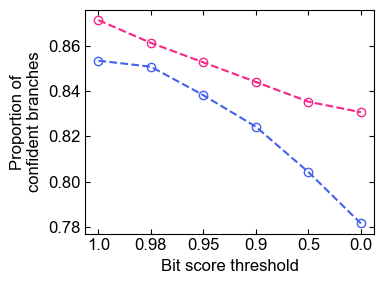

In [45]:
plt.figure(figsize = (4, 3))
datum_kegg_bs_1 = df_kegg_bs_1['pp1'].values
datum_kegg_bs_098 = df_kegg_bs_098['pp1'].values
datum_kegg_bs_095 = df_kegg_bs_095['pp1'].values
datum_kegg_bs_09 = df_kegg_bs_09['pp1'].values
datum_kegg_bs_05 = df_kegg_bs_05['pp1'].values
datum_kegg_bs_0 = df_kegg_bs_0['pp1'].values
y = [np.sum(datum_kegg_bs_1 >= 0.95) / len(datum_kegg_bs_1),
    np.sum(datum_kegg_bs_098 >= 0.95) / len(datum_kegg_bs_098),
     np.sum(datum_kegg_bs_095 >= 0.95) / len(datum_kegg_bs_095),
     np.sum(datum_kegg_bs_09 >= 0.95) / len(datum_kegg_bs_09),
    np.sum(datum_kegg_bs_05 >= 0.95) / len(datum_kegg_bs_05),
    np.sum(datum_kegg_bs_0 >= 0.95) / len(datum_kegg_bs_0)]
x = np.arange(len(y))
plt.plot(x, y, marker = 'o', color = '#f72585', label = 'KEGG', ls = 'dashed', markerfacecolor = 'none')

datum_eggnog_bs_1 = df_eggnog_bs_1['pp1'].values
datum_eggnog_bs_098 = df_eggnog_bs_098['pp1'].values
datum_eggnog_bs_095 = df_eggnog_bs_095['pp1'].values
datum_eggnog_bs_09 = df_eggnog_bs_09['pp1'].values
datum_eggnog_bs_05 = df_eggnog_bs_05['pp1'].values
datum_eggnog_bs_0 = df_eggnog_bs_0['pp1'].values
y = [np.sum(datum_eggnog_bs_1 >= 0.95) / len(datum_eggnog_bs_1),
    np.sum(datum_eggnog_bs_098 >= 0.95) / len(datum_eggnog_bs_098),
     np.sum(datum_eggnog_bs_095 >= 0.95) / len(datum_eggnog_bs_095),
     np.sum(datum_eggnog_bs_09 >= 0.95) / len(datum_eggnog_bs_09),
     np.sum(datum_eggnog_bs_05 >= 0.95) / len(datum_eggnog_bs_05),
    np.sum(datum_eggnog_bs_0 >= 0.95) / len(datum_eggnog_bs_0)]
plt.plot(x, y, marker = 'o', color = '#4361ee', label = 'EggNog', ls = 'dashed', markerfacecolor = 'none')     

plt.xticks(x, labels = [1.0, 0.98, 0.95, 0.9, 0.5, 0.0])
# plt.legend()
plt.xlabel('Bit score threshold')
plt.ylabel('Proportion of\nconfident branches')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.savefig(f'./figures/figure_S3A_lpp.svg')
plt.show()

Number of copies

In [46]:
# order: bs_1, bs_098, bs_095, bs_09, bs_05, bs_0
# Calculated during marker selection: as adj_mod2[list(all_genes)].sum()
number_genes_kegg = np.array([517991, 529715, 547561, 578943, 755383, 787005])
number_genes_eggnog = np.array([544029, 572413, 628288, 733821, 1292816, 1635329])

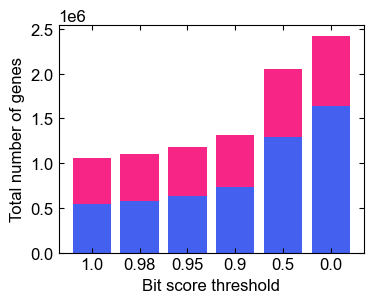

In [47]:
plt.figure(figsize = (3.9, 3.2))
x = [0, 1, 2, 3, 4, 5]
plt.bar(x, number_genes_eggnog, color = '#4361ee')
plt.bar(x, number_genes_kegg, bottom = number_genes_eggnog, color = '#f72585')
plt.xticks(x, labels = [1.0, 0.98, 0.95, 0.9, 0.5, 0.0])
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.xlabel('Bit score threshold')
plt.ylabel('Total number of genes')
plt.savefig(f'./figures/figure_S3A_copy_number.svg')
plt.show()